<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguage Natural

## Proyecto Final
### Análisis de la reciente tendencia asociada a *Lana Rhoades* y su impacto en twitter

El presente proyecto pretende analizar los tweets asociados a la noticia del embarazo de Lana Rhoades reconocida actriz del cine para adultos y generar un modelo de agrupamiento con el fin de identificar diferentes grupos que puedan categorizar los tweets usando un modelo no supervisado de clustering.

- Sebastian Vargas
- Sergio Siabato
- Danilo Plazas

## Autenticación con la API de Twitter

In [1]:
import json
import pandas as pd
pd.set_option('display.max_colwidth', None)
import tweepy

with open('credentials.json') as f:
    keys = json.load(f)

# Autenticar a través de la API 
auth = tweepy.OAuthHandler(keys['api_key'], keys['api_secret_key'])
auth.set_access_token(keys['access_token'], keys['access_token_secret'])
api = tweepy.API(auth, wait_on_rate_limit=True)

##  Extracción de datos
Extraemos los tuits en español relacionados con la tematica de `Lana Rhoades` sin restricción de ubicación para el rango de fechas contenido entre el "31-05-2021" y "03-06-2021"

In [2]:
tweets = tweepy.Cursor(api.search,
                       q=['Lana Rhoades -RT'],
                       since='2021-05-31',
                       until='2021-06-03', 
                       lang='es',
                       #geocode='4.7110,-74.0721,100km',
                       tweet_mode='extended',
                       include_rts=False,
                       include_entities=True
                       ).items(3000)

## Preprocesamiento de datos
convertimos la respuesta de la api en un dataframe que contiene:
- **tweets**: texto explicito del tweets
- **date**: fecha en la que el tweet fue publicado
- **user_location**: ubicación del usuario que publico el tweet
- **id**: identificador único del tweet
- **link**: enlace directo al tweet en mención
- **likes**: cantidad de `me gusta` que ha recibido dicho tweet
- **img_url**: enlace asociado a la imagen publicada en el tweet (solo si tiene una)

In [3]:
# Objeto generador
t = [tweet for tweet in tweets]
t_processed = []

for tweet in t: 
    temp = []
    temp.append(tweet.full_text)
    temp.append(tweet.created_at)
    temp.append(tweet.user.location)
    temp.append(tweet.id)
    temp.append(f"https://twitter.com/i/web/status/{tweet.id}")
    temp.append(tweet.favorite_count)
    temp.append(tweet.retweet_count)
    if "media" in tweet.entities:
        temp.append(tweet.entities["media"][0]["media_url"])
        temp.append(tweet.entities["media"][0]["type"])
    t_processed.append(temp)
    
data = pd.DataFrame(t_processed)
data.columns = ['tweets', 'date', 'user_location', 'id', 'link', 'likes','retweets','img_url','media_type']
data.sample(10)

,tweets,date,user_location,id,link,likes,retweets,img_url,media_type
74,"@SantanaGini Primero lana rhoades y ahora tu jajaja, todas estan quedando embarazadas jaja",2021-06-02 20:28:45,"Bogotá, D.C., Colombia",1400187652217974795,https://twitter.com/i/web/status/1400187652217974795,0,0,None,None
1569,El hijo de Lana Rhoades cuando su mama le intente explicar lo que vió en Google cuando investigó su nombre: https://t.co/x3ge7vgwpf,2021-06-02 01:00:42,,1399893702630428680,https://twitter.com/i/web/status/1399893702630428680,1,0,http://pbs.twimg.com/ext_tw_video_thumb/1394754851356254213/pu/img/_lC66LwEYwo0or5P.jpg,photo
368,Ubica tu casilla\nKaty Perry\nSteph gomez\nLGBT\nLana Rhoades\nEva Longoria\nAsistente de Samsung\nCarlo Ancelotti\nClaudia Martin\nRapidos y Furiosos 9\nClub de Cuervos\nQue se celebra El 1 de junio\nPansexual\nPride\nMiguel bose\nhttps://t.co/A7RW4bYWRn,2021-06-02 14:10:31,,1400092470117945344,https://twitter.com/i/web/status/1400092470117945344,1,0,None,None
102,#Espectáculos | La exactriz del cine para adultos Lana Rhoades está embarazada https://t.co/b8ulAHbsJj https://t.co/PQwAo7g8fp,2021-06-02 19:30:22,Venezuela,1400172961605341190,https://twitter.com/i/web/status/1400172961605341190,6,1,http://pbs.twimg.com/media/E25p44PXoAUIAGI.jpg,photo
1142,"Voy a tener un hijo con Lana Rhoades, y aunque biológicamente no es mío, yo me haré responsable. \n\nPadre es el que cree",2021-06-02 02:33:30,,1399917056003395586,https://twitter.com/i/web/status/1399917056003395586,0,0,None,None
844,@senkosamaowo Lana rhoades? Una actriz porno,2021-06-02 04:22:42,Dunluce Castle ✨,1399944539452981250,https://twitter.com/i/web/status/1399944539452981250,0,0,None,None
1356,Y como e que lana rhoades sale preña ahora depue de to lo creampie que yo he visto de ella @LanaRhoadess answer me please,2021-06-02 01:38:32,Dominican Republic,1399903225931763713,https://twitter.com/i/web/status/1399903225931763713,0,0,None,None
1317,lana rhoades embarazada... ahi va mi ultima oportunidad de enamorarla casarme con ella y traerla al camino del señor y vivir una vida juntos,2021-06-02 01:47:50,Avellaneda,1399905565820829696,https://twitter.com/i/web/status/1399905565820829696,0,0,None,None
941,Hay que ser muy mierdas para burlarse sobre la situación y futuro hijo de Lana Rhoades,2021-06-02 03:36:06,Valhalla,1399932811046436866,https://twitter.com/i/web/status/1399932811046436866,2,0,None,None
1958,No amigo lana rhoades embarazada... \nLos papás llendo a buscar al nene https://t.co/dvsc8OoUzh,2021-06-01 22:51:07,"Florida, Uruguay",1399861094643023883,https://twitter.com/i/web/status/1399861094643023883,39,4,http://pbs.twimg.com/media/E21OPymWQAESE8H.jpg,photo


El dataframe anterior le realizamos un proceso de limpieza y transformación donde tendremos:
- **tweets**: texto explicito del tweets
- **date**: fecha en la que el tweet fue publicado
- **img_url**: enlace asociado a la imagen publicada en el tweet (solo si tiene una)
- **likes**: cantidad de `me gusta` que ha recibido dicho tweet
- **texto_limpio**: texto del tweet luego de aplicar un proceso de eliminación de patrones de texto
- **links**: arreglo con los enlaces asociados al tweet
- **hashtags**: arreglo con los hashtags usados en el tweet
- **mentions**: arreglo con las menciones usadas en el tweet
- **emojis**: arreglo con los emojis usados en el tweet

In [4]:
import re
import regex
import emoji 

data = data[['id','tweets', 'date','user_location','img_url','media_type','likes','retweets']]

pattern1 = '?P<pic>pic.twitter.com/[^\s]+'
pattern2 = '?P<url>https?://[^\s]+'

def text_clean(row):
    text = row['tweets']
    
    links = [tuple(j for j in i if j)[-1] for i in re.findall(f"({pattern1})|({pattern2})",text)]
    for link in links:
        text = text.replace(link,"")
    
    hashtags = [interaction for interaction in text.split() if interaction.startswith("#")]
    for hashtag in hashtags:
        text = text.replace(hashtag, "")
        
    mentions = [interaction for interaction in text.split() if interaction.startswith("@")]
    for mention in mentions:
        text = text.replace(mention, "")
        
    return text, links, hashtags, mentions

def get_emojis(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI['en'] for char in word):
            emoji_list.append(word)

    return emoji_list
  
  
data[['texto_limpio', 'links', 'hashtags', 'mentions']] = data.apply(text_clean, axis=1, result_type='expand')
data['emojis'] = data['texto_limpio'].apply(lambda text: get_emojis(text))
data.head()

,id,tweets,date,user_location,img_url,media_type,likes,retweets,texto_limpio,links,hashtags,mentions,emojis
0,1400239522215038979,Los hombres en serio sufren por el embarazo de Lana Rhoades? 🤣 🤣 🤣 🤣,2021-06-02 23:54:51,Vzla,None,None,7,0,Los hombres en serio sufren por el embarazo de Lana Rhoades? 🤣 🤣 🤣 🤣,[],[],[],"[🤣, 🤣, 🤣, 🤣]"
1,1400239458599981057,Lana Rhoades: *anuncia su embarazo* \n\nMi pana con una maestría y un doctorado en comedia: https://t.co/M0WZxPNiuQ,2021-06-02 23:54:36,,http://pbs.twimg.com/media/E26mXbCWYAIARw8.jpg,photo,14,1,Lana Rhoades: *anuncia su embarazo* \n\nMi pana con una maestría y un doctorado en comedia:,[https://t.co/M0WZxPNiuQ],[],[],[]
2,1400238369268023298,"Si hace algun chiste pendejo por que Lana Rhoades está embarazada, realmente tienes un onvre ahí.",2021-06-02 23:50:17,Anywhere is possible,None,None,0,0,"Si hace algun chiste pendejo por que Lana Rhoades está embarazada, realmente tienes un onvre ahí.",[],[],[],[]
3,1400237667950940160,No me la lana Rhoades 💔😖😥😩👶 https://t.co/RLkJN3GlKU,2021-06-02 23:47:29,"Roldan, Argentina",http://pbs.twimg.com/media/E26kNnNXMAADSAb.jpg,photo,4,0,No me la lana Rhoades 💔😖😥😩👶,[https://t.co/RLkJN3GlKU],[],[],"[💔, 😖, 😥, 😩, 👶]"
4,1400237136675164160,@_paachoo_ bro pero yo pensaba que Lana Rhoades ere virgen .-.,2021-06-02 23:45:23,,None,None,0,0,bro pero yo pensaba que Lana Rhoades ere virgen .-.,[],[],[@_paachoo_],[]


##  Visualización descriptiva de los tweets
Inicialmente vamos a representar la evolución de los tweets en el tiempo, tomando como base la cantidad de tweets publicados por cada hora entre el "31-05-2021" y "03-06-2021"; posterior a lo anterior mostraremos cuales son los emojis mas usados en el conjunto de tweets extraidos

In [5]:
data['hora'] = data['date'].dt.floor('60T').astype(str)#.dt.time
temp = pd.DataFrame(data.hora.value_counts()).reset_index()
temp.columns = ['hora', 'cnt']
temp = temp.sort_values('hora')
# temp

In [6]:
import plotly.io as pio
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import matplotlib.pyplot as plt
%matplotlib inline
init_notebook_mode(connected=True)


trace = go.Scatter(x=temp.hora.values,
                   y=temp.cnt.values,
                   text=[f"Fecha: {f}<br>Tuits: {c}" for f,c in zip(temp.hora.values,temp.cnt.values)],
                   hoverinfo='text',
                   mode='lines+markers',
                   name='Horas',
                   line={'color': 'blue'})

layout = go.Layout(title="Número de tuits por cada hora (31-May a 3-Jun)")

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [7]:
from collections import Counter

temp_emojis = pd.DataFrame(list(zip(Counter(sum(data.emojis.values,[])).keys(),Counter(sum(data.emojis.values,[])).values())))
temp_emojis.columns = ['emoji', 'cnt']
temp_emojis.sort_values('cnt', ascending=False, inplace=True)

trace = go.Bar(x=temp_emojis.emoji.values[:15],
               y=temp_emojis.cnt.values[:15])

layout = go.Layout(title='Emojis más usados')

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

En lo siguiente se trata de observar los tweets mas relevantes de todo el conjunto de tweets usando como criterio de ordenamiento la cantidad de "me gusta" recibidos y mostraremos algunos casos para dar un contexto mas amplio del tweet usando como base la imagen asociada al tweet.

In [8]:
data.sort_values(by="likes", ascending=False).head(10)

,id,tweets,date,user_location,img_url,media_type,likes,retweets,texto_limpio,links,hashtags,mentions,emojis,hora
1640,1399891090577268743,"""Lana Rhoades"":\nPorque anunció que está embarazada https://t.co/cti9dos769",2021-06-02 00:50:19,"Tendencias, Argentina",http://pbs.twimg.com/media/E21phlhWEAUIhRE.jpg,photo,20402,633,"""Lana Rhoades"":\nPorque anunció que está embarazada",[https://t.co/cti9dos769],[],[],[],2021-06-02 00:00:00
1736,1399885861630713858,*Lana rhoades sale embarazada*\n\nLas oficinas de brazzers: https://t.co/Ur4pxtozvV,2021-06-02 00:29:32,,http://pbs.twimg.com/media/E21kxYrWEAcbtvD.jpg,photo,7885,1035,*Lana rhoades sale embarazada*\n\nLas oficinas de brazzers:,[https://t.co/Ur4pxtozvV],[],[],[],2021-06-02 00:00:00
1952,1399861858107023368,El bebé de lana rhoades cuando nazca: https://t.co/5Be8Lm9Vop,2021-06-01 22:54:09,Santa Fe City,http://pbs.twimg.com/media/E21O8NXWQAIYSG9.jpg,photo,6840,849,El bebé de lana rhoades cuando nazca:,[https://t.co/5Be8Lm9Vop],[],[],[],2021-06-01 22:00:00
1557,1399894470750048262,Lana Rhoades: noooo hijooo no busques mi nombre en google https://t.co/sQY5pED1ZE,2021-06-02 01:03:45,Japón,http://pbs.twimg.com/media/E21smMdX0AELWSk.jpg,photo,4986,501,Lana Rhoades: noooo hijooo no busques mi nombre en google,[https://t.co/sQY5pED1ZE],[],[],[],2021-06-02 01:00:00
1564,1399894054633148426,El hijo de Lana Rhoades cuando googlee el nombre de su mamá: https://t.co/qiuQe2KU4k,2021-06-02 01:02:06,México,http://pbs.twimg.com/media/E21sOREXwAQFrUU.jpg,photo,4805,508,El hijo de Lana Rhoades cuando googlee el nombre de su mamá:,[https://t.co/qiuQe2KU4k],[],[],[],2021-06-02 01:00:00
1755,1399884692514553857,When te enteras ahora que Lana Rhoades está embarazada y el Cruz Azul Campeón https://t.co/xswiREBqHM,2021-06-02 00:24:53,México,http://pbs.twimg.com/media/E21jtRZX0AInxlC.jpg,photo,3692,406,When te enteras ahora que Lana Rhoades está embarazada y el Cruz Azul Campeón,[https://t.co/xswiREBqHM],[],[],[],2021-06-02 00:00:00
1903,1399866287560462337,"¡TERRIBLE NOTICIA! 🥺💔\n\nLana Rhoades está embarazada, llora el mundo entero. https://t.co/CN1wzj7K2f",2021-06-01 23:11:45,,http://pbs.twimg.com/media/E21S99EXIAEXNDA.jpg,photo,3095,364,"¡TERRIBLE NOTICIA! 🥺💔\n\nLana Rhoades está embarazada, llora el mundo entero.",[https://t.co/CN1wzj7K2f],[],[],"[🥺, 💔]",2021-06-01 23:00:00
1942,1399862565900009473,Se embarazó Lana Rhoades: https://t.co/d4ycYkb5S3,2021-06-01 22:56:58,Paraguay,http://pbs.twimg.com/media/E21PlXZXMAEnLnO.jpg,photo,3027,378,Se embarazó Lana Rhoades:,[https://t.co/d4ycYkb5S3],[],[],[],2021-06-01 22:00:00
1625,1399891410871062530,@porquetendencia Cuando el pibe de Lana Rhoades crezca https://t.co/psVgkMjNNJ,2021-06-02 00:51:35,,http://pbs.twimg.com/media/E21p0ZmXMAEWIPm.jpg,photo,2682,129,Cuando el pibe de Lana Rhoades crezca,[https://t.co/psVgkMjNNJ],[],[@porquetendencia],[],2021-06-02 00:00:00
1784,1399881858624667653,El doctor cuando se alivie Lana Rhoades https://t.co/phtXRFtYiJ,2021-06-02 00:13:38,"Monterrey, Nuevo León",http://pbs.twimg.com/media/E21hIYBWEAAP6if.jpg,photo,2001,134,El doctor cuando se alivie Lana Rhoades,[https://t.co/phtXRFtYiJ],[],[],[],2021-06-02 00:00:00


<img src="http://pbs.twimg.com/media/E21O8NXWQAIYSG9.jpg" width="350" height="500"><img src="http://pbs.twimg.com/media/E21WjgtWUAAAbaa.jpg" width="350" height="500">

### Nube de palabras
Implementaremos una nube de palabras con todo el conjunto de tweets pero agregamos las palabras `Lana Rhoades` a los stopwords con el fin de excluirlo de nuestra visualización

In [9]:
import re
import numpy as np
from nltk.corpus import stopwords
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display
stopwords = stopwords.words("spanish")
stopwords.extend(["lana", "rhoades"])

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = [palabra for palabra in texto.split() if palabra not in stopwords]
    texto = " ".join(texto)
    return texto

data['pp'] = data.texto_limpio.apply(lambda texto: pre_procesado(texto))
palabras = data.pp.str.cat(sep=" ")

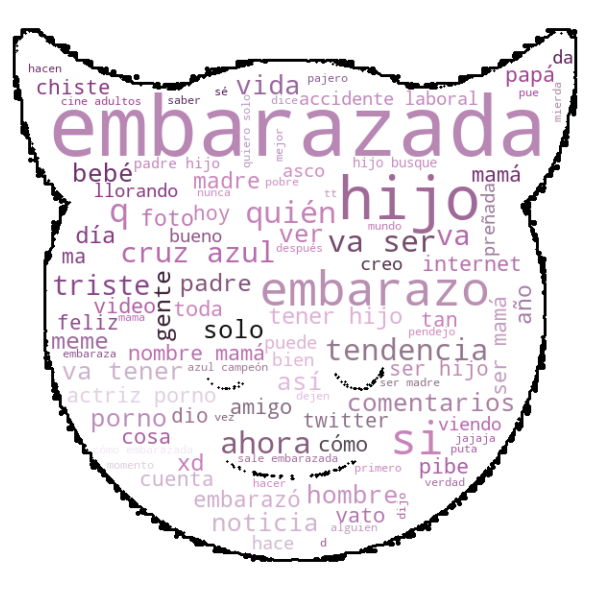

In [10]:
# CARGAR IMAGEN 
img = PIL.Image.open("emoji.jpg")
mask = np.array(img)

wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color="white", colormap="spring",
                      stopwords=stopwords, collocations=True,
                      mask=mask, contour_width=2, contour_color='black').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

image_colors=ImageColorGenerator(mask)

# wordcloud.to_file("test.png")

plt.figure(figsize=(10,8))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Clustering

Aplicamos metodos de clustering para agrupar los tuits y encontrar los terminos más relevantes de cada grupo. 

Utilizamos TF IDF para crear la matriz de palabras y sus respectivos pesos

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)
tfidf = tfidf_vect.fit_transform(data.pp.values)
tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns = tfidf_vect.get_feature_names())

In [12]:
tfidf_matrix

,aa,aaaa,abajo,abandonar,abatido,abolicionista,aborto,abras,abrir,abrirse,...,ídolo,ídolos,índice,ñaño,última,último,única,único,útero,ᵀⁱᵍʳᵉˢ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

## K means

Utilizaremos el metodo K-Means para realizar el agrupamiento de tuits

In [14]:
ks = []
k_inertias = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k).fit(tfidf_matrix)
    k_inertia = kmeans.inertia_
    
    ks.append(k)
    k_inertias.append(k_inertia)   

Mediante el metodo de la gráfica de codo determinamos la mejor cantidad de clusters a implementar 

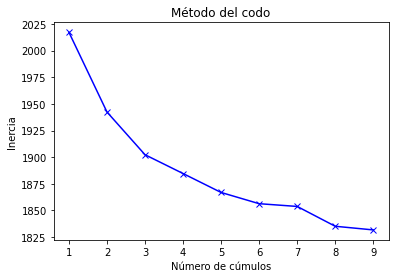

In [15]:
plt.xlabel("Número de cúmulos")
plt.ylabel("Inercia")
plt.title("Método del codo")
plt.plot(ks, k_inertias, 'bx-');

Entrenamos el modelo y agregamos una columna con el cluster asignado a cada Tuit

In [16]:
k = 3
model = KMeans(n_clusters=k)
model.fit(tfidf_matrix)

data['cluster'] = model.labels_
data.sample(5)

,id,tweets,date,user_location,img_url,media_type,likes,retweets,texto_limpio,links,hashtags,mentions,emojis,hora,pp,cluster
397,1400084549674098693,Los hijos de Lana Rhoades al buscar el nombre de su mamá en google: https://t.co/f1j76wyiwF,2021-06-02 13:39:03,,http://pbs.twimg.com/media/E24ZejKXoAQAfj_.jpg,photo,3,0,Los hijos de Lana Rhoades al buscar el nombre de su mamá en google:,[https://t.co/f1j76wyiwF],[],[],[],2021-06-02 13:00:00,hijos buscar nombre mamá google,1
2011,1399856362306289666,Que raro y a la ves que felicidad ver que Lana Rhoades será mamá 😳,2021-06-01 22:32:19,,None,None,0,0,Que raro y a la ves que felicidad ver que Lana Rhoades será mamá 😳,[],[],[],[😳],2021-06-01 22:00:00,raro ves felicidad ver mamá,1
286,1400119121254051843,El wey que dice que el hijo de Lana Rhoades es suyo https://t.co/5IRIPQmFT8,2021-06-02 15:56:26,"Puebla, México",http://pbs.twimg.com/media/E24460rUUAY0MCc.jpg,photo,5,1,El wey que dice que el hijo de Lana Rhoades es suyo,[https://t.co/5IRIPQmFT8],[],[],[],2021-06-02 15:00:00,wey dice hijo,2
2053,1399584348941164544,@_Lana_Rhoades Me gusta esa canción y wow,2021-06-01 04:31:26,,None,None,0,0,Me gusta esa canción y wow,[],[],[@_Lana_Rhoades],[],2021-06-01 04:00:00,gusta canción wow,1
913,1399936050198425601,Lana Rhoades no por favor 😭😭😭,2021-06-02 03:48:58,,None,None,0,0,Lana Rhoades no por favor 😭😭😭,[],[],[],"[😭, 😭, 😭]",2021-06-02 03:00:00,favor,1


Mediante el método de Vecinos Cercanos determinamos los Tuits más cercanos a cada centroide hallado para hallar los terminos más relevantes de cada cluster

In [17]:
nbrs = NearestNeighbors(n_neighbors=2, metric='euclidean').fit(tfidf_matrix.values)

clust_cnt = data['cluster'].value_counts()
clust_cnt_pct = data['cluster'].value_counts(normalize=True)

centroides = model.cluster_centers_

In [18]:
terms = tfidf_vect.get_feature_names()
order_centroids = centroides.argsort()[:, ::-1]

for i in range(k):
    print(f"Cluster # {i}")
    print(f"Tiene {clust_cnt[i]} registros ({clust_cnt_pct[i]:.2%} de los datos)")
    print()
    print("TÉRMINOS MÁS REPRESENTATIVOS")
    for ind in order_centroids[i][:10]:
        print(terms[ind], end=" ")
    print()
    print('*****************************************************************')

Cluster # 0
Tiene 86 registros (4.15% de los datos)

TÉRMINOS MÁS REPRESENTATIVOS
embarazada ahora padre google ser xd buscar anuncia puede cuenta 
*****************************************************************
Cluster # 1
Tiene 1771 registros (85.51% de los datos)

TÉRMINOS MÁS REPRESENTATIVOS
embarazada embarazo ser va si hijo cómo quién mamá porno 
*****************************************************************
Cluster # 2
Tiene 214 registros (10.33% de los datos)

TÉRMINOS MÁS REPRESENTATIVOS
hijo nombre google tener busque mamá va naciendo nadie padre 
*****************************************************************


## Analisis de Componentes Principales (PCA)
Se realiza PCA (de dos Componentes) al conjunto de datos ya con su respectivo cluster y representamos el resultado en un grafico de dispersión

In [19]:
from sklearn.decomposition import PCA
import plotly.graph_objs as go
from plotly.offline import iplot

pca = PCA(n_components=2)

result = pca.fit_transform(tfidf_matrix)
result = pd.DataFrame(result)
result.columns = ['X', 'Y']
result['cluster'] = data.cluster.values
result['texto'] = data.pp.apply(lambda val: val[:140])

In [20]:
colorsIdx = {0: 'blue',
             1: 'yellow',
             2: 'green',
             3: 'black'
            }

result['colores'] = result['cluster'].map(colorsIdx)

result.head()

,X,Y,cluster,texto,colores
0,-0.084146,-0.109950,1,hombres serio sufren embarazo,yellow
1,-0.079387,-0.103394,1,anuncia embarazo pana maestría doctorado comedia,yellow
2,0.029532,-0.061020,1,si hace algun chiste pendejo embarazada realmente onvre ahí,yellow
3,-0.070476,-0.076398,1,,yellow
4,-0.071702,-0.081884,1,bro pensaba ere virgen,yellow


In [21]:
trace = go.Scatter(x=result['X'].values,
                   y=result['Y'].values,
                   text=result['texto'].values,
                   mode='markers',
                   marker=dict(color=result['colores'].values)) 

layout = go.Layout(title="PCA")
fig = go.Figure(data=trace, layout=layout)
iplot(fig)

## Análisis de Sentimientos
Usando la libreria `sentiment_analysis_spanish` para tweets en español, calculamos el score de sentimiento que va de 0 (negativo) a 1 (positivo) para el conjunto de tweets

In [22]:
from sentiment_analysis_spanish import sentiment_analysis

sentiment = sentiment_analysis.SentimentAnalysisSpanish()

data['sentiment'] = data['texto_limpio'].apply(lambda val: round(sentiment.sentiment(val),3))
data.sample(5)

c:\Users\Home\Documents\Repositorios\KL-Natural_Language_Processing\env\lib\site-packages\sklearn\base.py:315: UserWarning:

Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.

c:\Users\Home\Documents\Repositorios\KL-Natural_Language_Processing\env\lib\site-packages\sklearn\base.py:315: UserWarning:

Trying to unpickle estimator MultinomialNB from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.



,id,tweets,date,user_location,img_url,media_type,likes,retweets,texto_limpio,links,hashtags,mentions,emojis,hora,pp,cluster,sentiment
1051,1399923728239280128,"Lana Rhoades está embarazada, pues que decir, que sea muy feliz de aquí en adelante en su nueva etapa. Se lo merece ❤️ https://t.co/mzYDmX5zr4",2021-06-02 03:00:00,,http://pbs.twimg.com/media/E22HL4-WYAkZNsA.jpg,photo,1,0,"Lana Rhoades está embarazada, pues que decir, que sea muy feliz de aquí en adelante en su nueva etapa. Se lo merece ❤️",[https://t.co/mzYDmX5zr4],[],[],[❤️],2021-06-02 03:00:00,embarazada pues decir feliz aquí adelante nueva etapa merece,1,0.000
1515,1399895971056734212,"Todo empezó con el Cruz Azul campeón, ahora salen videos de ovnis del Pentágono, luego Lana Rhoades embarazada, mañana chabelo se muere, se les dijo!. https://t.co/hlOZAi04kO",2021-06-02 01:09:42,Ciudad de Mexico,None,None,2,0,"Todo empezó con el Cruz Azul campeón, ahora salen videos de ovnis del Pentágono, luego Lana Rhoades embarazada, mañana chabelo se muere, se les dijo!.",[https://t.co/hlOZAi04kO],[],[],[],2021-06-02 01:00:00,empezó cruz azul campeón ahora salen videos ovnis pentágono luego embarazada mañana chabelo muere dijo,1,0.000
1894,1399867541988777984,En q video lana rhoades dijo eso https://t.co/Jki4K3vsbL,2021-06-01 23:16:44,Canadá,None,None,0,0,En q video lana rhoades dijo eso,[https://t.co/Jki4K3vsbL],[],[],[],2021-06-01 23:00:00,q video dijo,1,0.015
79,1400185715598794753,Quien más dijo que era el papá del baby de Lana Rhoades? Para que seamos compadres,2021-06-02 20:21:03,"São Paulo, BR - Ayolas, PY",None,None,0,0,Quien más dijo que era el papá del baby de Lana Rhoades? Para que seamos compadres,[],[],[],[],2021-06-02 20:00:00,dijo papá baby compadres,1,0.000
1297,1399907196121530372,Lana Rhoades está embarazada :c,2021-06-02 01:54:19,Concordia-Entre Ríos,None,None,0,0,Lana Rhoades está embarazada :c,[],[],[],[],2021-06-02 01:00:00,embarazada c,0,0.662


In [26]:
data.to_csv("raw_tweets.csv", sep=';', decimal="," ,header=True, index=False)

In [24]:
print(f"El sentimiento promedio de los tweets tiene un score de {round(data['sentiment'].mean(),2)} lo cual representa un sentimiento negativo")

El sentimiento promedio de los tweets tiene un score de 0.14 lo cual representa un sentimiento negativo


In [25]:
data[["cluster","sentiment"]].groupby(["cluster"]).mean()

,sentiment
cluster,
0,0.423186
1,0.130001
2,0.136009


## Power BI - Dashboard

In [2]:
from powerbiclient import Report, models

# Import the DeviceCodeLoginAuthentication class to authenticate against Power BI
from powerbiclient.authentication import DeviceCodeLoginAuthentication

# Initiate device authentication
device_auth = DeviceCodeLoginAuthentication()

Performing interactive authentication. Please follow the instructions on the terminal.
 To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code RSBKPXZQK to authenticate.
You have logged in.
Interactive authentication successfully completed.


In [4]:
group_id="3bcd6af5-9045-4522-b6b0-c95bb49121a5"
report_id="5f722c69-84a2-4194-9a8a-f7123dc51152"

report = Report(group_id=group_id, report_id=report_id, auth=device_auth)
report

Report()